In [1]:
from IPython.core.display import display, HTML, Markdown
import networkx as nx
import copy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams["figure.figsize"] = (15,7)
#plt.rcParams["figure.figsize"] = (10,7)


In [2]:
def evaluation_format(answ, pt_green,pt_red):
    pt_blue=0
    if pt_green!=0:
        pt_blue=pt_red-pt_green
        pt_red=0
    return f"{answ}. Totalizzeresti <span style='color:green'>[{pt_green} safe pt]</span>, \
                                    <span style='color:blue'>[{pt_blue} possible pt]</span>, \
                                    <span style='color:red'>[{pt_red} out of reach pt]</span>.<br>"

def Latex_type(string):
    return string.replace("_", "\_")

def subplt(grafo_1, grafo_2):
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (15,7)
       
    
    plt.subplot(121)
    pos = dict( (n, n) for n in grafo_1.nodes() )
    labels = dict( ((i, j), i * 6 + j) for i, j in grafo_1.nodes() )
    nx.draw_networkx_nodes(grafo_1, pos, alpha=0.6) #node_color='cyan',
    nx.draw_networkx_labels(grafo_1, pos, labels=labels)
    positive=[(u,v) for (u,v,d) in grafo_1.edges(data=True) if d['w'] >= 0]
    negative=[(u,v) for (u,v,d) in grafo_1.edges(data=True) if d['w'] < 0]    
    nx.draw_networkx_edges(grafo_1,pos,edgelist=positive,width=2,alpha = 0.6,edge_color = "g",arrows=True)
    nx.draw_networkx_edges(grafo_1,pos,edgelist=negative,width=2,alpha = 0.6,edge_color = "r",arrows=True)    
    labels = nx.get_edge_attributes(grafo_1,'w')
    nx.draw_networkx_edge_labels(grafo_1,pos,edge_labels=labels)
    
    plt.subplot(122)
    pos = dict( (n, n) for n in grafo_2.nodes() )
    labels = dict( ((i, j), i * 6 + j) for i, j in grafo_2.nodes() )
    nx.draw_networkx_nodes(grafo_2, pos, alpha=0.6) #node_color='cyan',
    nx.draw_networkx_labels(grafo_2, pos, labels=labels)
    positive=[(u,v) for (u,v,d) in grafo_2.edges(data=True) if d['w'] >= 0]
    negative=[(u,v) for (u,v,d) in grafo_2.edges(data=True) if d['w'] < 0]    
    nx.draw_networkx_edges(grafo_2,pos,edgelist=positive,width=2,alpha = 0.6,edge_color = "g",arrows=True)
    nx.draw_networkx_edges(grafo_2,pos,edgelist=negative,width=2,alpha = 0.6,edge_color = "r",arrows=True)    
    labels = nx.get_edge_attributes(grafo_2,'w')
    nx.draw_networkx_edge_labels(grafo_2,pos,edge_labels=labels)
    
    
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.title.set_text('Grafo 1')
    ax2.title.set_text('Grafo 2')

    plt.show()

def visualizza_griglia(grafo):
    pos = dict( (n, n) for n in grafo.nodes() )
    labels = dict( ((i, j), i * 6 + j) for i, j in grafo.nodes() )
    #nx.draw_networkx(icosaedro, pos)
    nx.draw_networkx_nodes(grafo, pos, alpha=0.6) #node_color='cyan',
    nx.draw_networkx_labels(grafo, pos, labels=labels)
    #disegna archi e etichette sugli archi
    positive=[(u,v) for (u,v,d) in grafo.edges(data=True) if d['w'] >= 0]
    negative=[(u,v) for (u,v,d) in grafo.edges(data=True) if d['w'] < 0]
    
    
    nx.draw_networkx_edges(grafo,pos,edgelist=positive,width=2,alpha = 0.6,edge_color = "g",arrows=True)
    nx.draw_networkx_edges(grafo,pos,edgelist=negative,width=2,alpha = 0.6,edge_color = "r",arrows=True)
    
    labels = nx.get_edge_attributes(grafo,'w')
    nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels)
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_axis_off()
    
def verifica_ciclo_negativo(grafo,node_list, return_only_boolean=False):
    n=len(node_list)
    aux=[]
    for node in node_list:
        aux.append((node//6, node%6))
    check = 0
    if return_only_boolean==False:
        visualizza_griglia(grafo)
    try:
        for i in range(1,n):
            check = check + grafo[aux[i-1]][aux[i]]['w']
        check = check + grafo[aux[n-1]][aux[0]]['w']
        if check < 0:
            if return_only_boolean:
                return True
            return  evaluation_format("Si", 10, 10)+f"Mi hai convinto! La sequenza di nodi $node\_list={node_list}$  che hai fornito descrive effettivamente un ciclo negativo."
        else:
            if return_only_boolean:
                return False
            return evaluation_format("No", 0, 10)+f"La sequenza di nodi $node\_list={node_list}$ che hai fornito NON descrive un ciclo negativo."
    except:
        if return_only_boolean:
            return False
        return evaluation_format("No", 0, 10)+f"La sequenza di nodi $node\_list={node_list}$ che hai fornito non forma un ciclo nel grafo"
    
def verifica_presenza_solo_cicli_positivi(grafo, pesi_nodi, return_only_boolean=False):
    if len(pesi_nodi)!=len(grafo.nodes):
        if return_only_boolean:
            return False
        return evaluation_format("No", 0, 10)+f"La lista che hai fornito dà un peso a ${len(pesi_nodi)}$ nodi, mentre i nodi nel grafo sono ${len(grafo.nodes)}$"
    G=copy.deepcopy(grafo)
    for (u,v) in G.edges:
        G[u][v]['w'] = G[u][v]['w'] - pesi_nodi[v[0]*6+v[1]] + pesi_nodi[u[0]*6+u[1]]
    if return_only_boolean==False:
        visualizza_griglia(G)
    for (u,v) in G.edges:
        if G[u][v]['w'] < 0:
            if return_only_boolean:
                return False
            return evaluation_format("No", 0, 10)+f"Come vedi il grafo pesato $(𝐺, w'_2)$ NON è conservativo in quanto la pesatura $w'_2$ è negativa su almeno un arco, dove il peso /ridotto' $w'_2[(u,v)] := w_2[(u,v)] -pot[v] + pot[u]$ per ogni arco $(u,v)$ di $G$. Chiaramente $(𝐺, w'_2)$ è conservativo se e solo se $(𝐺, w_2)$ è conservativo dato che $\sum_""{(u,v) \in C""} w'_2[(u,v)] = \sum_""{(u,v) \in C""} w_2[(u,v)]$ per ogni ciclo di $G$ e, più in generale, $\sum_""{(u,v) \in P""} w'_2[(u,v)] = \sum_""{(u,v) \in P""} w_2[(u,v)] -pot[t] +pot[s]$ per ogni cammino $P$ che vada da un nodo $s$ ad un nodo $t$."
    if return_only_boolean:
        return True
    return evaluation_format("SI", 10, 10)+f"Come vedi il grafo pesato $(𝐺, w'_2)$ è certamente conservativo in quanto la pesatura $w'_2$ non è negativa su alcun arco, dove il peso /ridotto' $w'_2[(u,v)] := w_2[(u,v)] -pot[v] + pot[u]$ per ogni arco $(u,v)$ di $G$. Chiaramente $(𝐺, w'_2)$ è conservativo se e solo se $(𝐺, w_2)$ è conservativo dato che $\sum_""{(u,v) \in C""} w'_2[(u,v)] = \sum_""{(u,v) \in C""} w_2[(u,v)]$ per ogni ciclo di $G$ e, più in generale, $\sum_""{(u,v) \in P""} w'_2[(u,v)] = \sum_""{(u,v) \in P""} w_2[(u,v)] -pot[t] +pot[s]$ per ogni cammino $P$ che vada da un nodo $s$ ad un nodo $t$."

In [12]:
#Unit test
nodes=[ 
        (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5),
        (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5),
        (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5),
        (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5),
        (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5),
        (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)
    ]

yaml_edges=[   # commenta le righe relative agli archi dell'icosaedro che vuoi deletare. Usa flip per invertire la direzione degii archi
             #colonna1
            {"flip":0,"tail":(0,0),"head":(0,1),'w': -7},
            {"flip":0,"tail":(0,1),"head":(0,2),'w': 1},
            {"flip":1,"tail":(0,2),"head":(0,3),'w': 2},
            {"flip":0,"tail":(0,3),"head":(0,4),'w': -5},
            {"flip":0,"tail":(0,4),"head":(0,5),'w': 12},
            #colonna2
            {"flip":0,"tail":(1, 0),"head":(1, 1),'w': 9},
            {"flip":0,"tail":(1, 1),"head":(1, 2),'w': 3},
            {"flip":0,"tail":(1, 2),"head":(1, 3),'w': 7},
            {"flip":0,"tail":(1, 3),"head":(1, 4),'w': 5},
            {"flip":0,"tail":(1, 4),"head":(1, 5),'w': 5},
            #colonna3
            {"flip":0,"tail":(2, 0),"head":(2, 1),'w': 11},
            {"flip":0,"tail":(2, 1),"head":(2, 2),'w': 8},
            {"flip":0,"tail":(2, 2),"head":(2, 3),'w': 6},
            {"flip":0,"tail":(2, 3),"head":(2, 4),'w': -2},
            {"flip":0,"tail":(2, 4),"head":(2, 5),'w': 5},
            #colonna4
            {"flip":0,"tail":(3, 0),"head":(3, 1),'w': -17},
            {"flip":0,"tail":(3, 1),"head":(3, 2),'w':12},
            {"flip":0,"tail":(3, 2),"head":(3, 3),'w': 19},
            {"flip":1,"tail":(3, 3),"head":(3, 4),'w': 3},
            {"flip":0,"tail":(3, 4),"head":(3, 5),'w': 12},
            #colonna5
            {"flip":0,"tail":(4, 0),"head":(4, 1),'w': -1},
            {"flip":0,"tail":(4, 1),"head":(4, 2),'w': -1},
            {"flip":0,"tail":(4, 2),"head":(4, 3),'w': -1},
            {"flip":0,"tail":(4, 3),"head":(4, 4),'w': 7},
            {"flip":0,"tail":(4, 4),"head":(4, 5),'w': 10},
            #colonna6
            {"flip":0,"tail":(5, 0),"head":(5, 1),'w': 19},
            {"flip":0,"tail":(5, 1),"head":(5, 2),'w': 3},
            {"flip":0,"tail":(5, 2),"head":(5, 3),'w': -9},
            {"flip":0,"tail":(5, 3),"head":(5, 4),'w': -1},
            {"flip":0,"tail":(5, 4),"head":(5, 5),'w': -1},
            #riga1
            {"flip":0,"tail":(0, 0),"head":(1, 0),'w': -1},
            {"flip":0,"tail":(1, 0),"head":(2, 0),'w': -1},
            {"flip":0,"tail":(2, 0),"head":(3, 0),'w': -1},
            {"flip":0,"tail":(3, 0),"head":(4, 0),'w': 7},
            {"flip":0,"tail":(4, 0),"head":(5, 0),'w': -5},
             #riga2
            {"flip":0,"tail":(0, 1),"head":(1, 1),'w': -1},
            {"flip":0,"tail":(1, 1),"head":(2, 1),'w': -1},
            {"flip":0,"tail":(2, 1),"head":(3, 1),'w': -1},
            {"flip":0,"tail":(3, 1),"head":(4, 1),'w': 7},
            {"flip":0,"tail":(4, 1),"head":(5, 1),'w': -5},
             #riga3
            {"flip":0,"tail":(0, 2),"head":(1, 2),'w': -1},
            {"flip":0,"tail":(1, 2),"head":(2, 2),'w': -1},
            {"flip":0,"tail":(2, 2),"head":(3, 2),'w': -1},
            {"flip":0,"tail":(3, 2),"head":(4, 2),'w': 7},
            {"flip":0,"tail":(4, 2),"head":(5, 2),'w': -5},
             #riga4
            {"flip":1,"tail":(0, 3),"head":(1, 3),'w': -1},
            {"flip":0,"tail":(1, 3),"head":(2, 3),'w': -1},
            {"flip":1,"tail":(2, 3),"head":(3, 3),'w': -1},
            {"flip":0,"tail":(3, 3),"head":(4, 3),'w': 7},
            {"flip":0,"tail":(4, 3),"head":(5, 3),'w': -5},
             #riga5
            {"flip":0,"tail":(0, 4),"head":(1, 4),'w': -1},
            {"flip":0,"tail":(1, 4),"head":(2, 4),'w': -1},
            {"flip":0,"tail":(2, 4),"head":(3, 4),'w': -1},
            {"flip":0,"tail":(3, 4),"head":(4, 4),'w': 7},
            {"flip":0,"tail":(4, 4),"head":(5, 4),'w': -5},
             #riga6
            {"flip":0,"tail":(0, 5),"head":(1, 5),'w': -1},
            {"flip":0,"tail":(1, 5),"head":(2, 5),'w': -1},
            {"flip":0,"tail":(2, 5),"head":(3, 5),'w': -1},
            {"flip":0,"tail":(3, 5),"head":(4, 5),'w': 7},
            {"flip":0,"tail":(4, 5),"head":(5, 5),'w': -5},

        ]

edges = []
for e in yaml_edges:
    if e["flip"] == 1:
        edges.append((e["head"],e["tail"],{'w':e["w"]}))
    else:
        edges.append((e["tail"],e["head"],{'w':e["w"]}))





griglia1=nx.DiGraph()
griglia1.add_nodes_from(nodes)
griglia1.add_edges_from(edges)

nodes=[ 
        (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), 
        (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), 
        (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), 
        (3, 0), (3, 1), (3, 2), (3, 3), (3, 4),
        (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)
    ]

yaml_edges=[   # commenta le righe relative agli archi dell'icosaedro che vuoi deletare. Usa flip per invertire la direzione degii archi
             #colonna1
            {"flip":0,"tail":(0,0),"head":(0,1),'w': 7},
            {"flip":0,"tail":(0,1),"head":(0,2),'w': 1},
            {"flip":1,"tail":(0,2),"head":(0,3),'w': 2},
            {"flip":0,"tail":(0,3),"head":(0,4),'w': 5},
            {"flip":0,"tail":(0,4),"head":(0,5),'w': 12},
            #colonna2
            {"flip":0,"tail":(1, 0),"head":(1, 1),'w': 9},
            {"flip":0,"tail":(1, 1),"head":(1, 2),'w': 3},
            {"flip":0,"tail":(1, 2),"head":(1, 3),'w': 7},
            {"flip":0,"tail":(1, 3),"head":(1, 4),'w': 5},
            {"flip":0,"tail":(1, 4),"head":(1, 5),'w': 5},
            #colonna3
            {"flip":0,"tail":(2, 0),"head":(2, 1),'w': 11},
            {"flip":0,"tail":(2, 1),"head":(2, 2),'w': 8},
            {"flip":0,"tail":(2, 2),"head":(2, 3),'w': 6},
            {"flip":0,"tail":(2, 3),"head":(2, 4),'w': 2},
            {"flip":0,"tail":(2, 4),"head":(2, 5),'w': 5},
            #colonna4
            {"flip":0,"tail":(3, 0),"head":(3, 1),'w': 17},
            {"flip":0,"tail":(3, 1),"head":(3, 2),'w':12},
            {"flip":0,"tail":(3, 2),"head":(3, 3),'w': 19},
            {"flip":0,"tail":(3, 3),"head":(3, 4),'w': 3},
            {"flip":0,"tail":(3, 4),"head":(3, 5),'w': 12},
            #colonna5
            {"flip":0,"tail":(4, 0),"head":(4, 1),'w': 1},
            {"flip":0,"tail":(4, 1),"head":(4, 2),'w': 1},
            {"flip":0,"tail":(4, 2),"head":(4, 3),'w': 1},
            {"flip":0,"tail":(4, 3),"head":(4, 4),'w': 7},
            {"flip":0,"tail":(4, 4),"head":(4, 5),'w': 10},
            #colonna6
            {"flip":0,"tail":(5, 0),"head":(5, 1),'w': 19},
            {"flip":0,"tail":(5, 1),"head":(5, 2),'w': 3},
            {"flip":0,"tail":(5, 2),"head":(5, 3),'w': 9},
            {"flip":0,"tail":(5, 3),"head":(5, 4),'w': 1},
            {"flip":0,"tail":(5, 4),"head":(5, 5),'w': 1},
            #riga1
            {"flip":0,"tail":(0, 0),"head":(1, 0),'w': 1},
            {"flip":0,"tail":(1, 0),"head":(2, 0),'w': 1},
            {"flip":0,"tail":(2, 0),"head":(3, 0),'w': 1},
            {"flip":0,"tail":(3, 0),"head":(4, 0),'w': 7},
            {"flip":0,"tail":(4, 0),"head":(5, 0),'w': 5},
             #riga2
            {"flip":0,"tail":(0, 1),"head":(1, 1),'w': 1},
            {"flip":0,"tail":(1, 1),"head":(2, 1),'w': 1},
            {"flip":0,"tail":(2, 1),"head":(3, 1),'w': 1},
            {"flip":0,"tail":(3, 1),"head":(4, 1),'w': 7},
            {"flip":0,"tail":(4, 1),"head":(5, 1),'w': 5},
             #riga3
            {"flip":0,"tail":(0, 2),"head":(1, 2),'w': -1},
            {"flip":0,"tail":(1, 2),"head":(2, 2),'w': 1},
            {"flip":0,"tail":(2, 2),"head":(3, 2),'w': 1},
            {"flip":0,"tail":(3, 2),"head":(4, 2),'w': 7},
            {"flip":0,"tail":(4, 2),"head":(5, 2),'w': 5},
             #riga4
            {"flip":1,"tail":(0, 3),"head":(1, 3),'w': -1},
            {"flip":0,"tail":(1, 3),"head":(2, 3),'w': 1},
            {"flip":0,"tail":(2, 3),"head":(3, 3),'w': 1},
            {"flip":0,"tail":(3, 3),"head":(4, 3),'w': 7},
            {"flip":0,"tail":(4, 3),"head":(5, 3),'w': 5},
             #riga5
            {"flip":0,"tail":(0, 4),"head":(1, 4),'w': 1},
            {"flip":0,"tail":(1, 4),"head":(2, 4),'w': 1},
            {"flip":0,"tail":(2, 4),"head":(3, 4),'w': 1},
            {"flip":0,"tail":(3, 4),"head":(4, 4),'w': 7},
            {"flip":0,"tail":(4, 4),"head":(5, 4),'w': 5},
             #riga6
            {"flip":0,"tail":(0, 5),"head":(1, 5),'w': 1},
            {"flip":0,"tail":(1, 5),"head":(2, 5),'w': 1},
            {"flip":0,"tail":(2, 5),"head":(3, 5),'w': 1},
            {"flip":0,"tail":(3, 5),"head":(4, 5),'w': 7},
            {"flip":0,"tail":(4, 5),"head":(5, 5),'w': 5},

        ]

edges = []
for e in yaml_edges:
    if e["flip"] == 1:
        edges.append((e["head"],e["tail"],{'w':e["w"]}))
    else:
        edges.append((e["tail"],e["head"],{'w':e["w"]}))


griglia2=nx.DiGraph()
griglia2.add_nodes_from(nodes)
griglia2.add_edges_from(edges)

assert(verifica_ciclo_negativo(griglia1,[15,16,22,21],True)==True)
assert(verifica_presenza_solo_cicli_positivi(griglia2,[0,0,0,-1,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],True)==True)

In [9]:
nodes=[ 
        (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5),
        (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5),
        (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5),
        (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5),
        (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5),
        (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)
    ]

yaml_edges=[   # commenta le righe relative agli archi dell'icosaedro che vuoi deletare. Usa flip per invertire la direzione degii archi
             #colonna1
            {"flip":0,"tail":(0,0),"head":(0,1),'w': -7},
            {"flip":0,"tail":(0,1),"head":(0,2),'w': 1},
            {"flip":1,"tail":(0,2),"head":(0,3),'w': 2},
            {"flip":0,"tail":(0,3),"head":(0,4),'w': -5},
            {"flip":0,"tail":(0,4),"head":(0,5),'w': 12},
            #colonna2
            {"flip":0,"tail":(1, 0),"head":(1, 1),'w': 9},
            {"flip":0,"tail":(1, 1),"head":(1, 2),'w': 3},
            {"flip":0,"tail":(1, 2),"head":(1, 3),'w': 7},
            {"flip":0,"tail":(1, 3),"head":(1, 4),'w': 5},
            {"flip":0,"tail":(1, 4),"head":(1, 5),'w': 5},
            #colonna3
            {"flip":0,"tail":(2, 0),"head":(2, 1),'w': 11},
            {"flip":0,"tail":(2, 1),"head":(2, 2),'w': 8},
            {"flip":0,"tail":(2, 2),"head":(2, 3),'w': 6},
            {"flip":0,"tail":(2, 3),"head":(2, 4),'w': -2},
            {"flip":0,"tail":(2, 4),"head":(2, 5),'w': 5},
            #colonna4
            {"flip":0,"tail":(3, 0),"head":(3, 1),'w': -17},
            {"flip":0,"tail":(3, 1),"head":(3, 2),'w':12},
            {"flip":0,"tail":(3, 2),"head":(3, 3),'w': 19},
            {"flip":1,"tail":(3, 3),"head":(3, 4),'w': 3},
            {"flip":0,"tail":(3, 4),"head":(3, 5),'w': 12},
            #colonna5
            {"flip":0,"tail":(4, 0),"head":(4, 1),'w': -1},
            {"flip":0,"tail":(4, 1),"head":(4, 2),'w': -1},
            {"flip":0,"tail":(4, 2),"head":(4, 3),'w': -1},
            {"flip":0,"tail":(4, 3),"head":(4, 4),'w': 7},
            {"flip":0,"tail":(4, 4),"head":(4, 5),'w': 10},
            #colonna6
            {"flip":0,"tail":(5, 0),"head":(5, 1),'w': 19},
            {"flip":0,"tail":(5, 1),"head":(5, 2),'w': 3},
            {"flip":0,"tail":(5, 2),"head":(5, 3),'w': -9},
            {"flip":0,"tail":(5, 3),"head":(5, 4),'w': -1},
            {"flip":0,"tail":(5, 4),"head":(5, 5),'w': -1},
            #riga1
            {"flip":0,"tail":(0, 0),"head":(1, 0),'w': -1},
            {"flip":0,"tail":(1, 0),"head":(2, 0),'w': -1},
            {"flip":0,"tail":(2, 0),"head":(3, 0),'w': -1},
            {"flip":0,"tail":(3, 0),"head":(4, 0),'w': 7},
            {"flip":0,"tail":(4, 0),"head":(5, 0),'w': -5},
             #riga2
            {"flip":0,"tail":(0, 1),"head":(1, 1),'w': -1},
            {"flip":0,"tail":(1, 1),"head":(2, 1),'w': -1},
            {"flip":0,"tail":(2, 1),"head":(3, 1),'w': -1},
            {"flip":0,"tail":(3, 1),"head":(4, 1),'w': 7},
            {"flip":0,"tail":(4, 1),"head":(5, 1),'w': -5},
             #riga3
            {"flip":0,"tail":(0, 2),"head":(1, 2),'w': -1},
            {"flip":0,"tail":(1, 2),"head":(2, 2),'w': -1},
            {"flip":0,"tail":(2, 2),"head":(3, 2),'w': -1},
            {"flip":0,"tail":(3, 2),"head":(4, 2),'w': 7},
            {"flip":0,"tail":(4, 2),"head":(5, 2),'w': -5},
             #riga4
            {"flip":1,"tail":(0, 3),"head":(1, 3),'w': -1},
            {"flip":0,"tail":(1, 3),"head":(2, 3),'w': -1},
            {"flip":1,"tail":(2, 3),"head":(3, 3),'w': -1},
            {"flip":0,"tail":(3, 3),"head":(4, 3),'w': 7},
            {"flip":0,"tail":(4, 3),"head":(5, 3),'w': -5},
             #riga5
            {"flip":0,"tail":(0, 4),"head":(1, 4),'w': -1},
            {"flip":0,"tail":(1, 4),"head":(2, 4),'w': -1},
            {"flip":0,"tail":(2, 4),"head":(3, 4),'w': -1},
            {"flip":0,"tail":(3, 4),"head":(4, 4),'w': 7},
            {"flip":0,"tail":(4, 4),"head":(5, 4),'w': -5},
             #riga6
            {"flip":0,"tail":(0, 5),"head":(1, 5),'w': -1},
            {"flip":0,"tail":(1, 5),"head":(2, 5),'w': -1},
            {"flip":0,"tail":(2, 5),"head":(3, 5),'w': -1},
            {"flip":0,"tail":(3, 5),"head":(4, 5),'w': 7},
            {"flip":0,"tail":(4, 5),"head":(5, 5),'w': -5},

        ]

edges = []
for e in yaml_edges:
    if e["flip"] == 1:
        edges.append((e["head"],e["tail"],{'w':e["w"]}))
    else:
        edges.append((e["tail"],e["head"],{'w':e["w"]}))





griglia1=nx.DiGraph()
griglia1.add_nodes_from(nodes)
griglia1.add_edges_from(edges)

nodes=[ 
        (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), 
        (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), 
        (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), 
        (3, 0), (3, 1), (3, 2), (3, 3), (3, 4),
        (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)
    ]

yaml_edges=[   # commenta le righe relative agli archi dell'icosaedro che vuoi deletare. Usa flip per invertire la direzione degii archi
             #colonna1
            {"flip":0,"tail":(0,0),"head":(0,1),'w': 7},
            {"flip":0,"tail":(0,1),"head":(0,2),'w': 1},
            {"flip":1,"tail":(0,2),"head":(0,3),'w': 2},
            {"flip":0,"tail":(0,3),"head":(0,4),'w': 5},
            {"flip":0,"tail":(0,4),"head":(0,5),'w': 12},
            #colonna2
            {"flip":0,"tail":(1, 0),"head":(1, 1),'w': 9},
            {"flip":0,"tail":(1, 1),"head":(1, 2),'w': 3},
            {"flip":0,"tail":(1, 2),"head":(1, 3),'w': 7},
            {"flip":0,"tail":(1, 3),"head":(1, 4),'w': 5},
            {"flip":0,"tail":(1, 4),"head":(1, 5),'w': 5},
            #colonna3
            {"flip":0,"tail":(2, 0),"head":(2, 1),'w': 11},
            {"flip":0,"tail":(2, 1),"head":(2, 2),'w': 8},
            {"flip":0,"tail":(2, 2),"head":(2, 3),'w': 6},
            {"flip":0,"tail":(2, 3),"head":(2, 4),'w': 2},
            {"flip":0,"tail":(2, 4),"head":(2, 5),'w': 5},
            #colonna4
            {"flip":0,"tail":(3, 0),"head":(3, 1),'w': 17},
            {"flip":0,"tail":(3, 1),"head":(3, 2),'w':12},
            {"flip":0,"tail":(3, 2),"head":(3, 3),'w': 19},
            {"flip":0,"tail":(3, 3),"head":(3, 4),'w': 3},
            {"flip":0,"tail":(3, 4),"head":(3, 5),'w': 12},
            #colonna5
            {"flip":0,"tail":(4, 0),"head":(4, 1),'w': 1},
            {"flip":0,"tail":(4, 1),"head":(4, 2),'w': 1},
            {"flip":0,"tail":(4, 2),"head":(4, 3),'w': 1},
            {"flip":0,"tail":(4, 3),"head":(4, 4),'w': 7},
            {"flip":0,"tail":(4, 4),"head":(4, 5),'w': 10},
            #colonna6
            {"flip":0,"tail":(5, 0),"head":(5, 1),'w': 19},
            {"flip":0,"tail":(5, 1),"head":(5, 2),'w': 3},
            {"flip":0,"tail":(5, 2),"head":(5, 3),'w': 9},
            {"flip":0,"tail":(5, 3),"head":(5, 4),'w': 1},
            {"flip":0,"tail":(5, 4),"head":(5, 5),'w': 1},
            #riga1
            {"flip":0,"tail":(0, 0),"head":(1, 0),'w': 1},
            {"flip":0,"tail":(1, 0),"head":(2, 0),'w': 1},
            {"flip":0,"tail":(2, 0),"head":(3, 0),'w': 1},
            {"flip":0,"tail":(3, 0),"head":(4, 0),'w': 7},
            {"flip":0,"tail":(4, 0),"head":(5, 0),'w': 5},
             #riga2
            {"flip":0,"tail":(0, 1),"head":(1, 1),'w': 1},
            {"flip":0,"tail":(1, 1),"head":(2, 1),'w': 1},
            {"flip":0,"tail":(2, 1),"head":(3, 1),'w': 1},
            {"flip":0,"tail":(3, 1),"head":(4, 1),'w': 7},
            {"flip":0,"tail":(4, 1),"head":(5, 1),'w': 5},
             #riga3
            {"flip":0,"tail":(0, 2),"head":(1, 2),'w': -1},
            {"flip":0,"tail":(1, 2),"head":(2, 2),'w': 1},
            {"flip":0,"tail":(2, 2),"head":(3, 2),'w': 1},
            {"flip":0,"tail":(3, 2),"head":(4, 2),'w': 7},
            {"flip":0,"tail":(4, 2),"head":(5, 2),'w': 5},
             #riga4
            {"flip":1,"tail":(0, 3),"head":(1, 3),'w': -1},
            {"flip":0,"tail":(1, 3),"head":(2, 3),'w': 1},
            {"flip":0,"tail":(2, 3),"head":(3, 3),'w': 1},
            {"flip":0,"tail":(3, 3),"head":(4, 3),'w': 7},
            {"flip":0,"tail":(4, 3),"head":(5, 3),'w': 5},
             #riga5
            {"flip":0,"tail":(0, 4),"head":(1, 4),'w': 1},
            {"flip":0,"tail":(1, 4),"head":(2, 4),'w': 1},
            {"flip":0,"tail":(2, 4),"head":(3, 4),'w': 1},
            {"flip":0,"tail":(3, 4),"head":(4, 4),'w': 7},
            {"flip":0,"tail":(4, 4),"head":(5, 4),'w': 5},
             #riga6
            {"flip":0,"tail":(0, 5),"head":(1, 5),'w': 1},
            {"flip":0,"tail":(1, 5),"head":(2, 5),'w': 1},
            {"flip":0,"tail":(2, 5),"head":(3, 5),'w': 1},
            {"flip":0,"tail":(3, 5),"head":(4, 5),'w': 7},
            {"flip":0,"tail":(4, 5),"head":(5, 5),'w': 5},

        ]

edges = []
for e in yaml_edges:
    if e["flip"] == 1:
        edges.append((e["head"],e["tail"],{'w':e["w"]}))
    else:
        edges.append((e["tail"],e["head"],{'w':e["w"]}))


griglia2=nx.DiGraph()
griglia2.add_nodes_from(nodes)
griglia2.add_edges_from(edges)

## Esercizio \[N pts\]
(Bellman-Ford) Un grafo diretto pesato con numeri interi sugli archi è detto conservativo se non contiene alcun ciclo negativo.\
Un ciclo è considerato negativo se è negativa la somma dei pesi dei suoi archi. \
Questo esercizio ti chiede di riconoscere se un grafo $G$ diretto e pesato a tè assegnato è conservativo oppure no, esprimendo il certificato del caso (o una sequenza ciclica di nodi che indichi il ciclo negativo od un numero intero $pot$ per ogni nodo tale che valga $pot[v] \leq pot[u] + peso[(u,v)]$ per ogni arco $(u,v)$). \
In realtà ti forniremo due diverse istanze di questo problema (due diverse pesature $w_1$ e $w_2$ di un stesso grafo diretto $G=(V,A)$) e ti chiederemo di stabilire quale delle due offra un grafo conservativo e quale no.

Ecco i due grafi: Grafo 1 (pesatura $w_1$) e Grafo 2 (pesatura $w_2$)

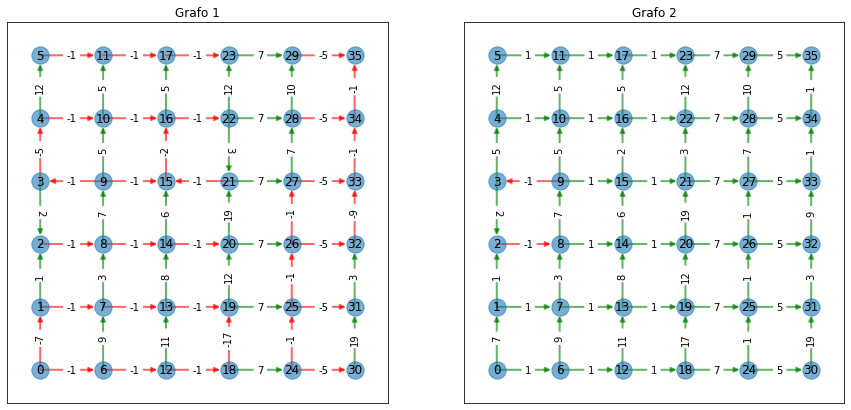

In [10]:
display(Markdown(f"Ecco i due grafi: Grafo 1 (pesatura $w_1$) e Grafo 2 (pesatura $w_2$)"))
subplt(griglia1,griglia2)

__Richieste__:

1. Individua quali tra le due pesature $w_1$ e $w_2$ contiene un cilo negativo.\
Forniscimi una lista di vertici che formano un ciclo negativo (rispetta la direzione degli archi).

Si. Totalizzeresti <span style='color:green'>[10 safe pt]</span>,                                     <span style='color:blue'>[0 possible pt]</span>,                                     <span style='color:red'>[0 out of reach pt]</span>.<br>Mi hai convinto! La sequenza di nodi $node\_list=[15, 16, 22, 21]$  che hai fornito descrive effettivamente un ciclo negativo.

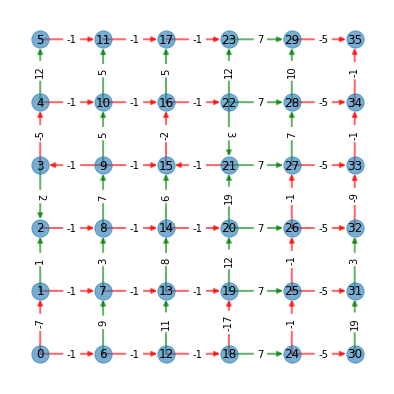

In [6]:
# Specifica quale dei due grafi contiene un ciclo negativo settando la seguente variabile:

GRAFO_CON_CICLO_NEGATIVO = 1   # 1 oppure 2 ?

assert GRAFO_CON_CICLO_NEGATIVO == 1 or GRAFO_CON_CICLO_NEGATIVO == 2

#passa come parametri alla funzione verifica_ciclo_negativo il grafo che contiene il ciclo negativo (icosaedro_1
#se pensi sia quello con la pesatura w1 oppure icosaedro_2 se pensi sia quello con la pesatuta w2) e la lista che 
#contiene i vertici che formano il ciclo negativo

ciclo_neg=[15,16,22,21]

if GRAFO_CON_CICLO_NEGATIVO == 1:
    display(Markdown(verifica_ciclo_negativo(griglia1,ciclo_neg)))
if GRAFO_CON_CICLO_NEGATIVO == 2:
    display(Markdown(verifica_ciclo_negativo(griglia2,ciclo_neg)))

2. Forniscimi un certificato che nel grafo G non esista un ciclo negativo.\
  Per fare questo forniscimi una lista con i pesi da dare ai nodi (da 0 a n-1) in modo che il grafo G' derivato     dal grafo G applicando i pesi sui nodi dimostri la presenza di soli cicli positivi.

SI. Totalizzeresti <span style='color:green'>[10 safe pt]</span>,                                     <span style='color:blue'>[0 possible pt]</span>,                                     <span style='color:red'>[0 out of reach pt]</span>.<br>Come vedi il grafo pesato $(𝐺, w'_2)$ è certamente conservativo in quanto la pesatura $w'_2$ non è negativa su alcun arco, dove il peso /ridotto' $w'_2[(u,v)] := w_2[(u,v)] -pot[v] + pot[u]$ per ogni arco $(u,v)$ di $G$. Chiaramente $(𝐺, w'_2)$ è conservativo se e solo se $(𝐺, w_2)$ è conservativo dato che $\sum_{(u,v) \in C} w'_2[(u,v)] = \sum_{(u,v) \in C} w_2[(u,v)]$ per ogni ciclo di $G$ e, più in generale, $\sum_{(u,v) \in P} w'_2[(u,v)] = \sum_{(u,v) \in P} w_2[(u,v)] -pot[t] +pot[s]$ per ogni cammino $P$ che vada da un nodo $s$ ad un nodo $t$.

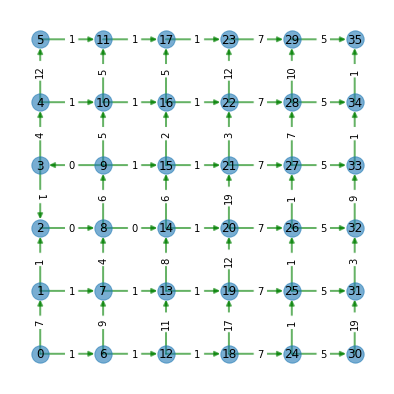

In [11]:
# Specifica quale dei due grafi NON contiene cicli negativi settando la seguente variabile:
GRAFO_SENZA_CICLI_NEGATIVI = 2   # 1 oppure 2 ?

assert GRAFO_SENZA_CICLI_NEGATIVI == 1 or GRAFO_SENZA_CICLI_NEGATIVI == 2

# Certificato di no, fornire peso che fa si che tutti gli archi abbiano un peso positivo
# i nodi vanno da 1 a n-1, mettimi il valore da sommare per far si di farmi vedere che tutti i cicli sono positivi

pesi_nodi=[0,0,0,-1,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


if GRAFO_SENZA_CICLI_NEGATIVI == 1:
    display(Markdown(verifica_presenza_solo_cicli_positivi(griglia1,pesi_nodi)))
if GRAFO_SENZA_CICLI_NEGATIVI == 2:
    display(Markdown(verifica_presenza_solo_cicli_positivi(griglia2,pesi_nodi)))

Hint: nel caso avessi dei dubbi nello svolgimento degli esercizi precedenti puoi visualizzare i seguenti link che ti aiuteranno a comprendere meglio il problema.

https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm